In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import cartopy
import cartopy.crs as ccrs
import os

In [3]:
CAPACITY_PATH = '/usr/people/most/01_ICEVEPS/input/capacities/2023Output/'
offwind = xr.open_dataset(os.path.join(CAPACITY_PATH, 'offwind_cap2023_LENTISgrid.nc'))
onwind = xr.open_dataset(os.path.join(CAPACITY_PATH, 'onwind_cap2023_LENTISgrid.nc'))
solar = xr.open_dataset(os.path.join(CAPACITY_PATH, 'solar_cap2023_LENTISgrid.nc'))
ror = xr.open_dataset(os.path.join(CAPACITY_PATH, 'run-of-river_from_jrc_estH_2023_2.nc'))
reservoir = xr.open_dataset(os.path.join(CAPACITY_PATH, 'reservoir_from_jrc_estH_2023_2.nc'))

In [4]:
total_windCAP = onwind.CAP.where(~np.isnan(onwind.CAP), 0) + offwind.CAP.where(~np.isnan(offwind.CAP), 0)
#TODO: doesn't work yet, because hydro and rest is not on same grid
total_renewable = total_windCAP + solar.CAP.where(~np.isnan(solar.CAP), 0) + ror.capacity.where(~np.isnan(ror.capacity), 0) + reservoir.capacity.where(~np.isnan(reservoir.capacity), 0)
total_windCAP = total_windCAP.where(total_windCAP != 0, np.nan)
total_renewable = total_renewable.where(total_renewable != 0, np.nan)
total_renewable

<xarray.DataArray (lat: 0, lon: 4)>
array([], shape=(0, 4), dtype=float64)
Coordinates:
  * lon      (lon) float64 -11.25 11.25 33.75 56.25
  * lat      (lat) float64

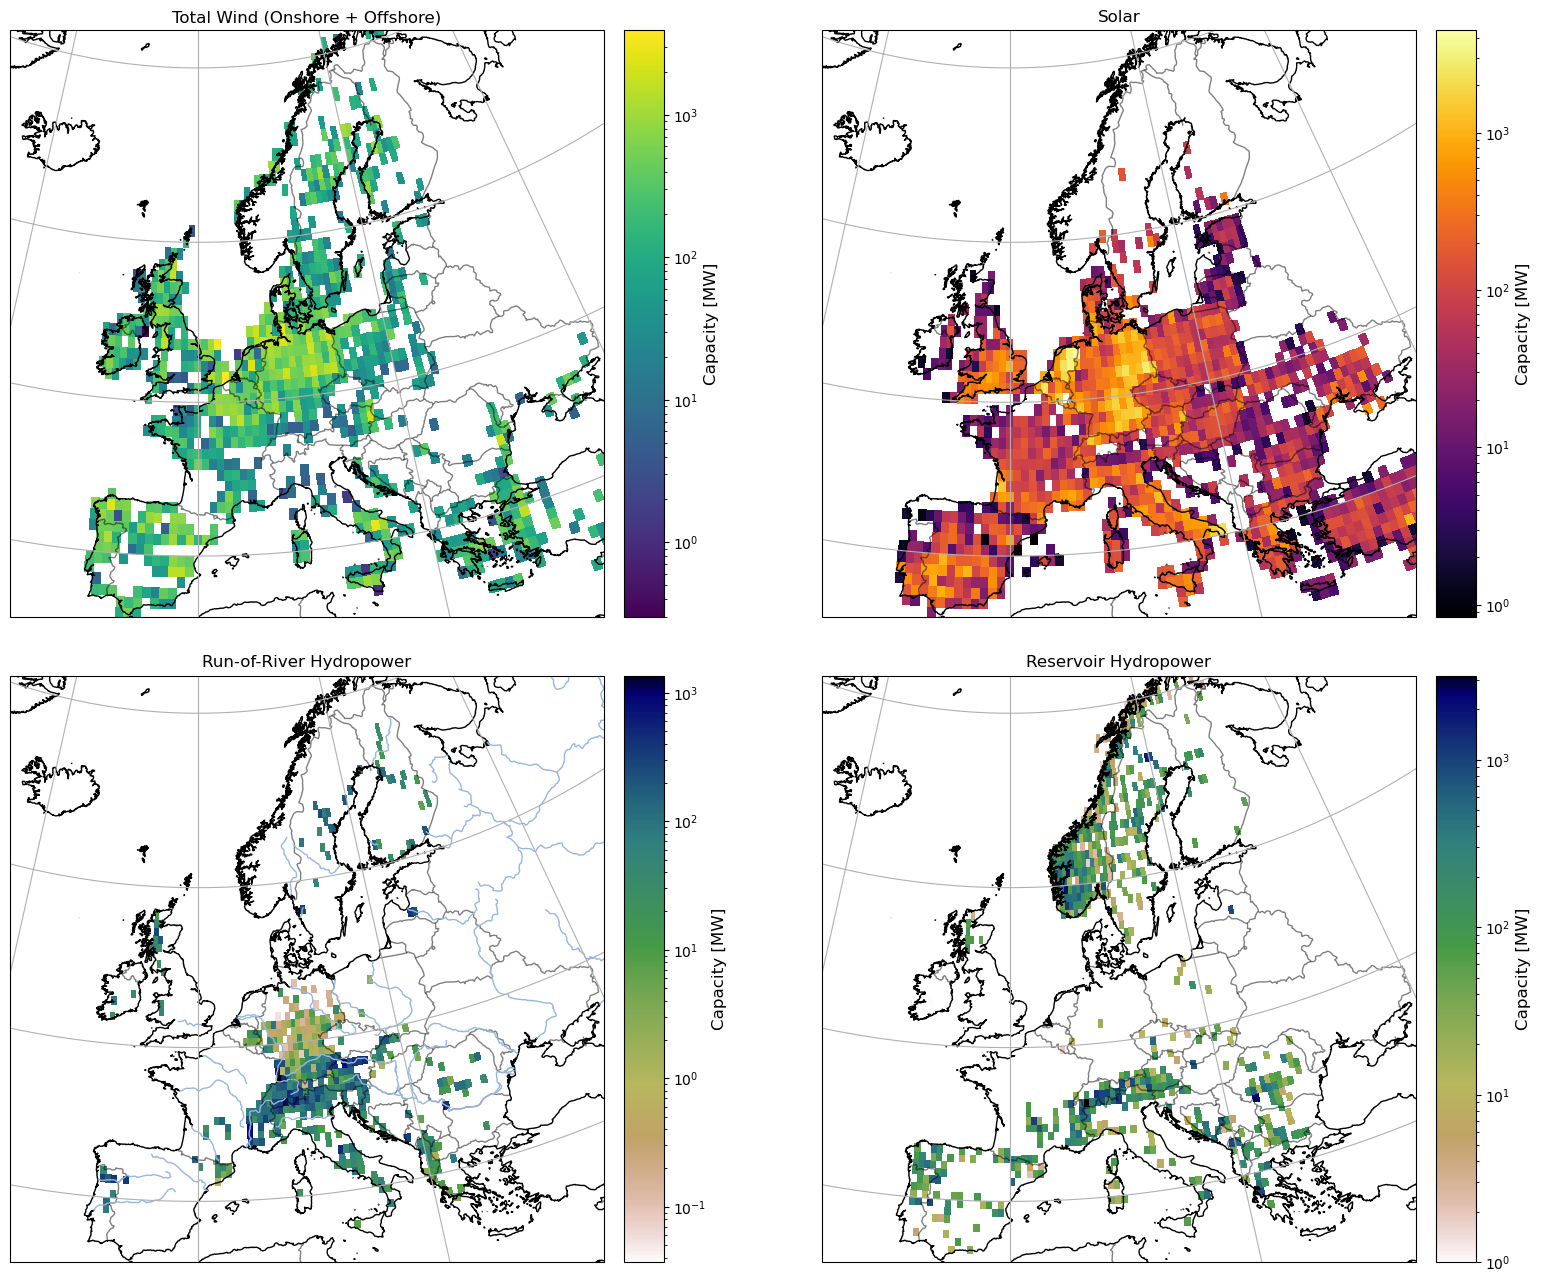

In [11]:
plots = [
    {'data': total_windCAP, 'capname': 'none', 'title': 'Total Wind (Onshore + Offshore)', 'cmap': 'viridis'},
    {'data': solar, 'capname': 'CAP', 'title': 'Solar', 'cmap': 'inferno'},
    {'data': ror, 'capname': 'capacity', 'title': 'Run-of-River Hydropower', 'cmap': 'gist_earth_r'},
    {'data': reservoir, 'capname': 'capacity', 'title': 'Reservoir Hydropower', 'cmap': 'gist_earth_r'}
]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 16),
                        subplot_kw={'projection': ccrs.LambertConformal(0, 45)},
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

axs = axs.flatten()

for ax, plot_info in zip(axs, plots):
    data = plot_info['data']
    capname = plot_info['capname']
    title = plot_info['title']
    cmap = plot_info['cmap']
    
    ax.set_extent([-15, 33, 35, 70])
    ax.gridlines()
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)
    
    if plot_info['data'] is ror:
        ax.add_feature(cartopy.feature.RIVERS, linestyle='-')

    if capname == 'none':
        pcolormesh = ax.pcolormesh(data.lon, data.lat, data, transform=ccrs.PlateCarree(), cmap=cmap, norm=colors.LogNorm())
    else:
        pcolormesh = ax.pcolormesh(data.lon, data.lat, data[capname], transform=ccrs.PlateCarree(), cmap=cmap, norm=colors.LogNorm())
    
    ax.set_title(title)
    cbar_ax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0, 0.02, ax.get_position().height])
    cbar = fig.colorbar(pcolormesh, cax=cbar_ax, label=f'{title} Capacity [MW]')
    cbar.set_label(f'Capacity [MW]', fontsize=12)  # Change the fontsize to your desired size

In [109]:
total_renewable

<xarray.DataArray (lat: 0, lon: 4)>
array([], shape=(0, 4), dtype=float64)
Coordinates:
  * lon      (lon) float64 -11.25 11.25 33.75 56.25
  * lat      (lat) float64

TypeError: Dimensions of C (0, 4) should be one smaller than X(5) and Y(0) while using shading='flat' see help(pcolormesh)

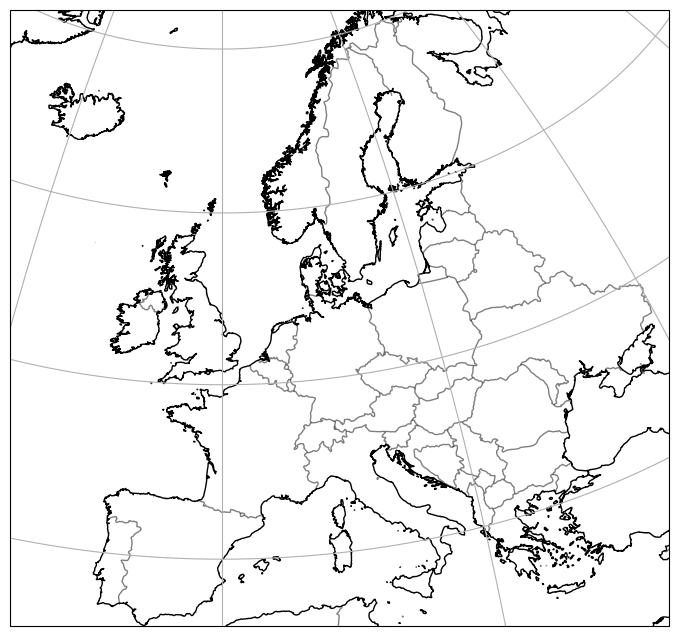

In [108]:
fig = plt.figure(figsize=(12, 8))
central_lon, central_lat = 0, 45
extent = [-15, 33, 35, 70]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)

w_total = ax.pcolormesh(total_renewable.lon, total_renewable.lat, total_renewable, transform=ccrs.PlateCarree(), cmap='jet_r', norm=colors.LogNorm())

cbar_ax1 = fig.add_axes([0.8, 0.15, 0.02, 0.7])

fig.colorbar(w_total, cax=cbar_ax1, label='Total wind capacity [MW]')

### Individual plots below

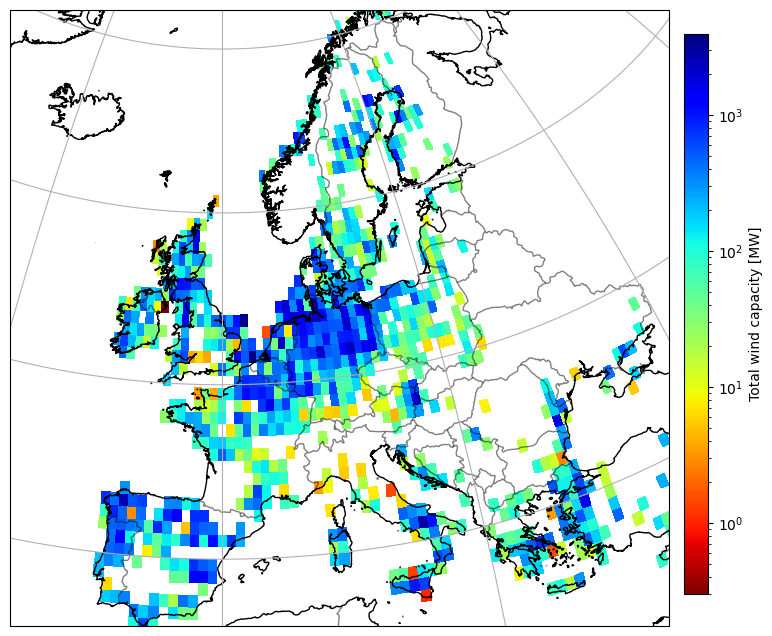

In [102]:
fig = plt.figure(figsize=(12, 8))
central_lon, central_lat = 0, 45
extent = [-15, 33, 35, 70]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)

w_total = ax.pcolormesh(offwind.lon, offwind.lat, total_windCAP, transform=ccrs.PlateCarree(), cmap='jet_r', norm=colors.LogNorm())

cbar_ax1 = fig.add_axes([0.8, 0.15, 0.02, 0.7])

fig.colorbar(w_total, cax=cbar_ax1, label='Total wind capacity [MW]')

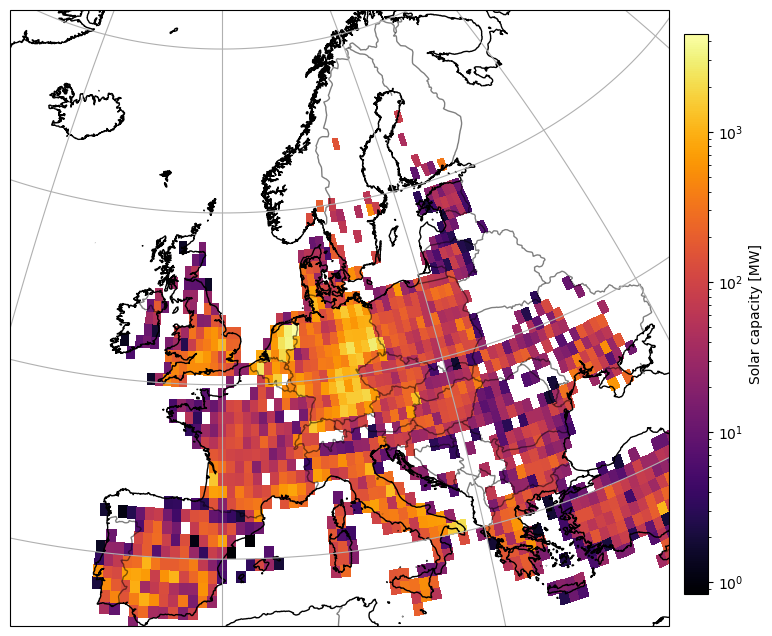

In [103]:
fig = plt.figure(figsize=(12, 8))
central_lon, central_lat = 0, 45
extent = [-15, 33, 35, 70]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)

s = ax.pcolormesh(solar.lon, solar.lat, solar.CAP, transform=ccrs.PlateCarree(), cmap='inferno', norm=colors.LogNorm())

cbar_ax1 = fig.add_axes([0.8, 0.15, 0.02, 0.7])

fig.colorbar(s, cax=cbar_ax1, label='Solar capacity [MW]')

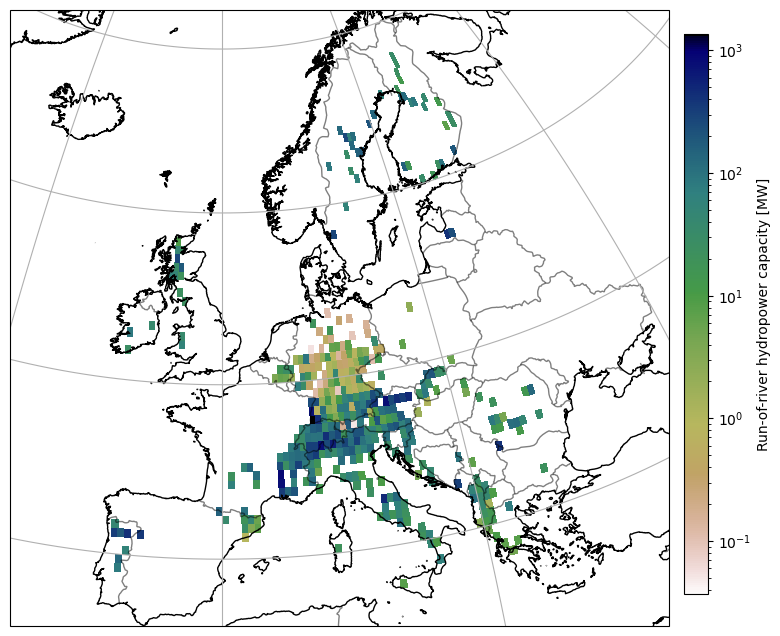

In [104]:
fig = plt.figure(figsize=(12, 8))
central_lon, central_lat = 0, 45
extent = [-15, 33, 35, 70]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)

ror_plot = ax.pcolormesh(ror.lon, ror.lat, ror.capacity, transform=ccrs.PlateCarree(), cmap='gist_earth_r', norm=colors.LogNorm())

cbar_ax1 = fig.add_axes([0.8, 0.15, 0.02, 0.7])

fig.colorbar(ror_plot, cax=cbar_ax1, label='Run-of-river hydropower capacity [MW]')

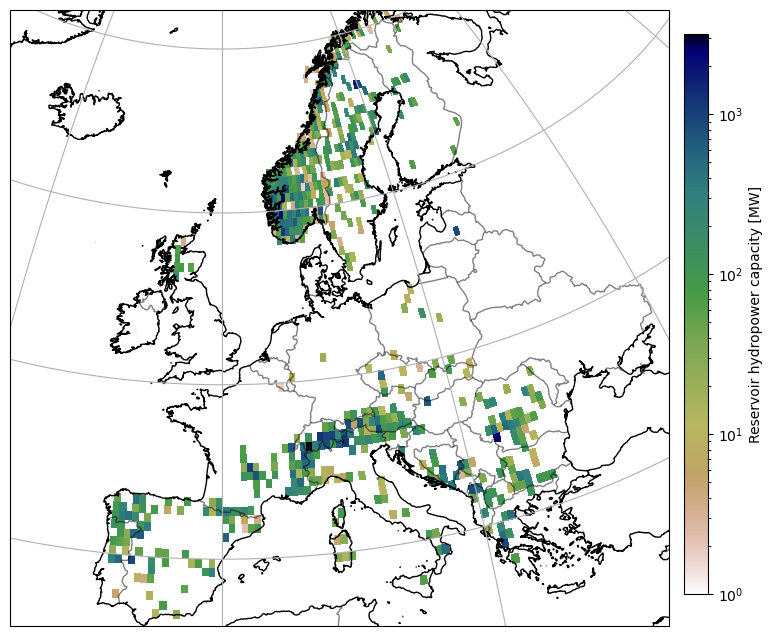

In [105]:
fig = plt.figure(figsize=(12, 8))
central_lon, central_lat = 0, 45
extent = [-15, 33, 35, 70]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)

res_plot = ax.pcolormesh(reservoir.lon, reservoir.lat, reservoir.capacity, transform=ccrs.PlateCarree(), cmap='gist_earth_r', norm=colors.LogNorm())

cbar_ax1 = fig.add_axes([0.8, 0.15, 0.02, 0.7])

fig.colorbar(res_plot, cax=cbar_ax1, label='Reservoir hydropower capacity [MW]')